# Predictive model for classification

In [1]:
import pandas as pd

DATA = "../data/customers_clustered_pca.csv"

df_clustered = pd.read_csv(DATA)

df_clustered.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases,cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,57,46-60,1617,1529,0,0,0,0,22,2
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,60,46-60,27,21,2,1,0,0,4,1
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,49,46-60,776,734,0,0,0,0,20,2
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,30,18-30,53,48,1,1,0,0,6,1
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,33,31-45,422,407,1,1,0,0,14,0


In [2]:
df_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2205 non-null   object 
 1   Marital_Status       2205 non-null   object 
 2   Income               2205 non-null   float64
 3   Kidhome              2205 non-null   int64  
 4   Teenhome             2205 non-null   int64  
 5   Recency              2205 non-null   int64  
 6   MntWines             2205 non-null   int64  
 7   MntFruits            2205 non-null   int64  
 8   MntMeatProducts      2205 non-null   int64  
 9   MntFishProducts      2205 non-null   int64  
 10  MntSweetProducts     2205 non-null   int64  
 11  MntGoldProds         2205 non-null   int64  
 12  NumDealsPurchases    2205 non-null   int64  
 13  NumWebPurchases      2205 non-null   int64  
 14  NumCatalogPurchases  2205 non-null   int64  
 15  NumStorePurchases    2205 non-null   i

In [3]:
X = df_clustered.drop('Response', axis=1)
y = df_clustered['Response']

In [4]:
X.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases,cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,57,46-60,1617,1529,0,0,0,0,22,2
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,60,46-60,27,21,2,1,0,0,4,1
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,49,46-60,776,734,0,0,0,0,20,2
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,30,18-30,53,48,1,1,0,0,6,1
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,33,31-45,422,407,1,1,0,0,14,0


In [5]:
y

0       1
1       0
2       0
3       0
4       0
       ..
2200    0
2201    0
2202    0
2203    0
2204    1
Name: Response, Length: 2205, dtype: int64

In [6]:
one_hot_cols = [
    'Education',
    'Marital_Status',
    'AgeGroup',
    'HasChildren',
    'HasAcceptedCmp',
    'AcceptedCmp1',
    'AcceptedCmp2',
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5',
    'Complain',
    'Kidhome',
    'Teenhome',
    'YearsSinceEnrolled',
    'Children',
    'AcceptedCmpTotal',
    'cluster'
]

standard_cols = [
    'Income',
    'Age',
]

power_cols = X.columns[X.columns.str.startswith('Mnt') | X.columns.str.startswith('Num')].tolist()

minmax_cols = [col for col in X.columns if col not in one_hot_cols + standard_cols + power_cols]

https://scikit-learn.org/0.16/modules/generated/sklearn.dummy.DummyClassifier.html

In [7]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline # essa será a bibliota usada para o pipeline
from imblearn.under_sampling import RandomUnderSampler

RANDOM_STATE = 42

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

preprocessing = ColumnTransformer(
    [
        ('one-hot', OneHotEncoder(), one_hot_cols),
        ('standard', StandardScaler(), standard_cols),
        ('minmax', MinMaxScaler(), minmax_cols),
        ('power', PowerTransformer(), power_cols)
    ]
)

pipeline_logreg = Pipeline(
    [
        ('preprocessing', preprocessing),
        ('feature_selection', SelectKBest(score_func=f_classif, k=10)),
        ('rus', RandomUnderSampler(random_state=RANDOM_STATE)),
        ('model', LogisticRegression(random_state=RANDOM_STATE))
    ]
)

pipeline_logreg.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status', 'AgeGroup',
                                                   'HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Kidhome', 'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'Children',
                                                   'AcceptedCmpTotal',
                                                   'cluster']),
                                                 ('standard', Stan...
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'MntRegularProds',
                                                   'NumTotalPurchases'])])),
                ('feature_selection', SelectKBest()),
                ('rus', RandomUnderSampler(random_state=42)),
                ('model', LogisticRegression(random_state=42))])

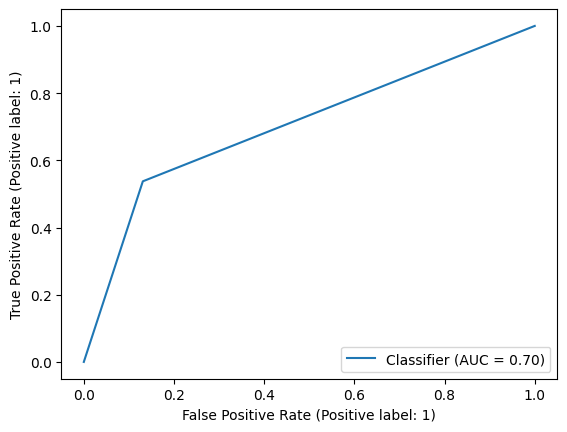

In [8]:
# ROC
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(pipeline_logreg, X, y, cv=skf, n_jobs=-1)

roc = RocCurveDisplay.from_predictions(y, y_pred)

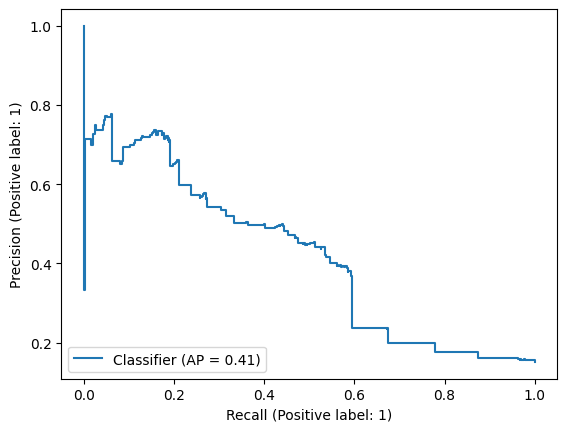

In [9]:
# precision-Recall
from sklearn.metrics import PrecisionRecallDisplay

y_pred = cross_val_predict(pipeline_logreg, X, y, cv=skf, n_jobs=-1, method='decision_function')

prc = PrecisionRecallDisplay.from_predictions(y, y_pred)

In [10]:
import numpy as np
from sklearn.model_selection import GridSearchCV

param_grid = {
    "feature_selection__k": [10, 15, 20, 25],
    "model__C": np.logspace(-3, 3, 7),
    "model__solver": ['liblinear', 'lbfgs', 'saga'],
    "model__penalty": ['l1', 'l2', 'elasticnet', 'none']
}

grid_search = GridSearchCV(
    pipeline_logreg,
    param_grid,
    scoring=['roc_auc', 'average_precision', 'accuracy'],
    n_jobs=-1,
    refit='average_precision'
)

In [11]:
grid_search

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('one-hot',
                                                                         OneHotEncoder(),
                                                                         ['Education',
                                                                          'Marital_Status',
                                                                          'AgeGroup',
                                                                          'HasChildren',
                                                                          'HasAcceptedCmp',
                                                                          'AcceptedCmp1',
                                                                          'AcceptedCmp2',
                                                                          'AcceptedCmp3',
                                                                          'AcceptedCmp4',
                                                                          'AcceptedCmp5',
                                                                          'Complain',
                                                                          'Kidhome',
                                                                          'Teenhome',
                                                                          'YearsSinceEnrolled',
                                                                          'Children',
                                                                          'AcceptedCmpTotal',
                                                                          'clus...
                                        RandomUnderSampler(random_state=42)),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'feature_selection__k': [10, 15, 20, 25],
                         'model__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'model__solver': ['liblinear', 'lbfgs', 'saga']},
             refit='average_precision',
             scoring=['roc_auc', 'average_precision', 'accuracy'])

In [12]:
import warnings

warnings.filterwarnings('ignore')

- Aqui foi usado a função de ignorar warnings, pois quando foi executado anteriormente foi verificado que todos os warnings são por combinações de "solver_penalty" que não são compativeis em certos paramentros usados.

In [13]:
grid_search.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('one-hot',
                                                                         OneHotEncoder(),
                                                                         ['Education',
                                                                          'Marital_Status',
                                                                          'AgeGroup',
                                                                          'HasChildren',
                                                                          'HasAcceptedCmp',
                                                                          'AcceptedCmp1',
                                                                          'AcceptedCmp2',
                                                                          'AcceptedCmp3',
                                                                          'AcceptedCmp4',
                                                                          'AcceptedCmp5',
                                                                          'Complain',
                                                                          'Kidhome',
                                                                          'Teenhome',
                                                                          'YearsSinceEnrolled',
                                                                          'Children',
                                                                          'AcceptedCmpTotal',
                                                                          'clus...
                                        RandomUnderSampler(random_state=42)),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'feature_selection__k': [10, 15, 20, 25],
                         'model__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'model__solver': ['liblinear', 'lbfgs', 'saga']},
             refit='average_precision',
             scoring=['roc_auc', 'average_precision', 'accuracy'])

In [14]:
grid_search.best_params_

{'feature_selection__k': 25,
 'model__C': 10.0,
 'model__penalty': 'l2',
 'model__solver': 'lbfgs'}

In [15]:
grid_search.best_score_

0.5862406913791165

In [18]:
print(*grid_search.cv_results_.keys(), sep='\n')

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_feature_selection__k
param_model__C
param_model__penalty
param_model__solver
params
split0_test_roc_auc
split1_test_roc_auc
split2_test_roc_auc
split3_test_roc_auc
split4_test_roc_auc
mean_test_roc_auc
std_test_roc_auc
rank_test_roc_auc
split0_test_average_precision
split1_test_average_precision
split2_test_average_precision
split3_test_average_precision
split4_test_average_precision
mean_test_average_precision
std_test_average_precision
rank_test_average_precision
split0_test_accuracy
split1_test_accuracy
split2_test_accuracy
split3_test_accuracy
split4_test_accuracy
mean_test_accuracy
std_test_accuracy
rank_test_accuracy


In [20]:
np.nanmax(grid_search.cv_results_['mean_test_average_precision'])

0.5862406913791165

In [21]:
np.nanmax(grid_search.cv_results_['mean_test_roc_auc'])

0.8656258387208343

In [22]:
np.nanmax(grid_search.cv_results_['mean_test_accuracy'])

0.8489795918367348

In [25]:
grid_search.cv_results_['params'][np.nanargmax(grid_search.cv_results_['mean_test_average_precision'])]

{'feature_selection__k': 25,
 'model__C': 10.0,
 'model__penalty': 'l2',
 'model__solver': 'lbfgs'}

In [26]:
grid_search.cv_results_['params'][np.nanargmax(grid_search.cv_results_['mean_test_roc_auc'])]

{'feature_selection__k': 25,
 'model__C': 10.0,
 'model__penalty': 'l1',
 'model__solver': 'liblinear'}

In [27]:
grid_search.cv_results_['params'][np.nanargmax(grid_search.cv_results_['mean_test_accuracy'])]

{'feature_selection__k': 10,
 'model__C': 0.001,
 'model__penalty': 'l1',
 'model__solver': 'liblinear'}

In [28]:
df_results_gs = pd.DataFrame(
    {
        'auprc': grid_search.cv_results_['mean_test_average_precision'],
        'auroc': grid_search.cv_results_['mean_test_roc_auc'],
        'accuracy': grid_search.cv_results_['mean_test_accuracy']
    }
)

df_results_gs

,auprc,auroc,accuracy
0,0.151020,0.500000,0.848980
1,NaN,NaN,NaN
2,0.151020,0.500000,0.848980
3,0.403915,0.722988,0.810884
4,0.403915,0.722988,0.810884
...,...,...,...
331,NaN,NaN,NaN
332,NaN,NaN,NaN
333,NaN,NaN,NaN
334,0.581378,0.865012,0.791837


<Axes: >

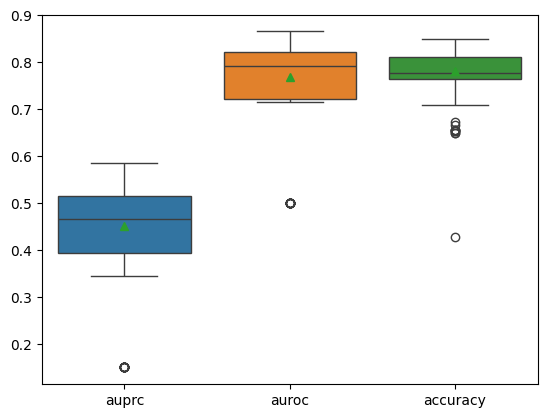

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.boxplot(
    data=df_results_gs,
    showmeans=True
)

In [30]:
grid_search.best_params_

{'feature_selection__k': 25,
 'model__C': 10.0,
 'model__penalty': 'l2',
 'model__solver': 'lbfgs'}

In [31]:
pipeline_logreg_best = Pipeline(
    [
        ('preprocessing', preprocessing),
        ('feature_selection', SelectKBest(score_func=f_classif, k=grid_search.best_params_['feature_selection__k'])),
        ('rus', RandomUnderSampler(random_state=RANDOM_STATE)),
        ('model', LogisticRegression(
            C=grid_search.best_params_['model__C'],
            penalty=grid_search.best_params_['model__penalty'],
            solver=grid_search.best_params_['model__solver'],
            random_state=RANDOM_STATE))
    ]
)

scores = cross_validate(
    pipeline_logreg_best,
    X,
    y,
    cv=skf,
    scoring=['accuracy', 'precision', 'recall', 'roc_auc', 'average_precision'],
    n_jobs=-1
)

In [33]:
pipeline_logreg_best

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status', 'AgeGroup',
                                                   'HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Kidhome', 'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'Children',
                                                   'AcceptedCmpTotal',
                                                   'cluster']),
                                                 ('standard', Stan...
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'MntRegularProds',
                                                   'NumTotalPurchases'])])),
                ('feature_selection', SelectKBest(k=25)),
                ('rus', RandomUnderSampler(random_state=42)),
                ('model', LogisticRegression(C=10.0, random_state=42))])

In [35]:
scores['times'] = scores['fit_time'] + scores['score_time']

scores

{'fit_time': array([0.13663411, 0.13463879, 0.13763213, 0.13763213, 0.13663411]),
 'score_time': array([0.02991986, 0.03291345, 0.03091741, 0.03690243, 0.03291249]),
 'test_accuracy': array([0.76190476, 0.7755102 , 0.78231293, 0.80725624, 0.75283447]),
 'test_precision': array([0.35606061, 0.37096774, 0.384     , 0.42276423, 0.35947712]),
 'test_recall': array([0.70149254, 0.68656716, 0.71641791, 0.78787879, 0.83333333]),
 'test_roc_auc': array([0.83177029, 0.83167052, 0.84007104, 0.8960202 , 0.85367677]),
 'test_average_precision': array([0.57164358, 0.56842045, 0.52404636, 0.67399109, 0.56684438]),
 'times': array([0.16655397, 0.16755223, 0.16854954, 0.17453456, 0.1695466 ])}

In [36]:
df_scores_best = pd.DataFrame(scores)
df_scores_best

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_average_precision,times
0,0.136634,0.029920,0.761905,0.356061,0.701493,0.831770,0.571644,0.166554
1,0.134639,0.032913,0.775510,0.370968,0.686567,0.831671,0.568420,0.167552
2,0.137632,0.030917,0.782313,0.384000,0.716418,0.840071,0.524046,0.168550
3,0.137632,0.036902,0.807256,0.422764,0.787879,0.896020,0.673991,0.174535
4,0.136634,0.032912,0.752834,0.359477,0.833333,0.853677,0.566844,0.169547


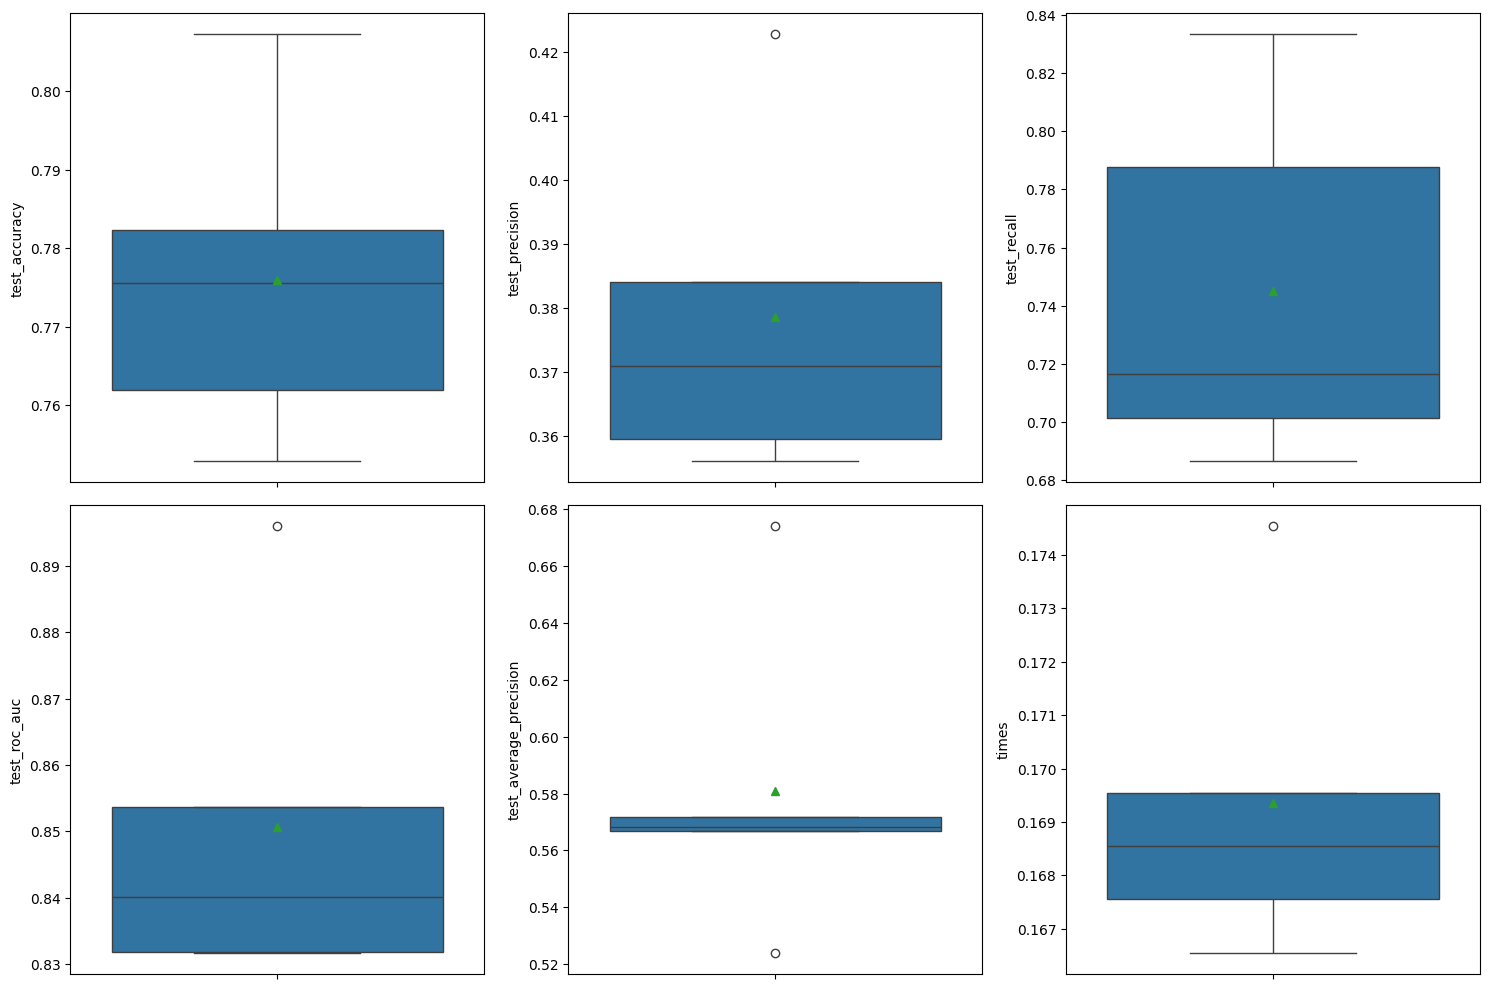

In [40]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), tight_layout=True)

cols = df_scores_best.columns[2:].to_list()


for ax, col in zip(axs.flatten(), cols):
    b = sns.boxplot(y=col, data=df_scores_best, ax=ax, showmeans=True)

plt.show()

In [41]:
pipeline_logreg_best.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status', 'AgeGroup',
                                                   'HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Kidhome', 'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'Children',
                                                   'AcceptedCmpTotal',
                                                   'cluster']),
                                                 ('standard', Stan...
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'MntRegularProds',
                                                   'NumTotalPurchases'])])),
                ('feature_selection', SelectKBest(k=25)),
                ('rus', RandomUnderSampler(random_state=42)),
                ('model', LogisticRegression(C=10.0, random_state=42))])

In [45]:
names = pipeline_logreg_best[:-1].get_feature_names_out()

In [44]:
importance = pipeline_logreg_best['model'].coef_[0]
importance

array([ 0.31505011, -0.05128903, -0.82998454,  1.09374563, -0.25974327,
        0.52350435, -0.56291424,  0.82667533,  0.07058315,  0.19317794,
       -0.23568809,  0.49944917,  0.31505011, -0.82998454, -1.80796746,
       -0.954504  , -0.55400962, -0.65370647, -3.02641608,  3.77559769,
       -0.42655832,  1.32879911,  0.34728495,  0.63737051, -1.50845227])

In [47]:
df_importance = pd.DataFrame(
    {
        'name': names,
        'importance': importance
    }
)

df_importance.sort_values(by='importance')

,name,importance
18,minmax__Recency,-3.026416
14,one-hot__AcceptedCmpTotal_1,-1.807967
24,power__MntRegularProds,-1.508452
15,one-hot__AcceptedCmpTotal_2,-0.954504
2,one-hot__HasAcceptedCmp_0,-0.829985
13,one-hot__AcceptedCmpTotal_0,-0.829985
17,one-hot__cluster_2,-0.653706
6,one-hot__AcceptedCmp3_0,-0.562914
16,one-hot__AcceptedCmpTotal_3,-0.554010
20,power__MntWines,-0.426558


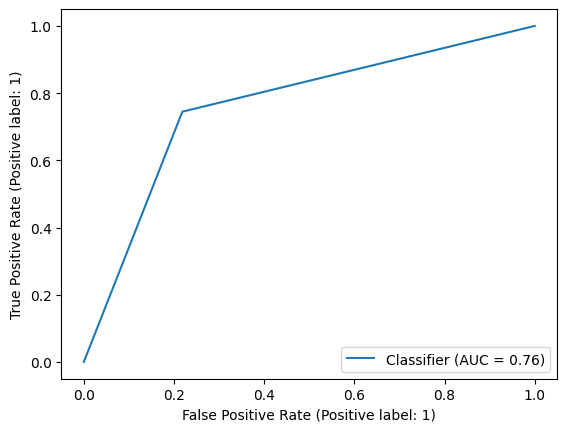

In [48]:
# ROC
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(pipeline_logreg_best, X, y, cv=skf, n_jobs=-1)

roc = RocCurveDisplay.from_predictions(y, y_pred)

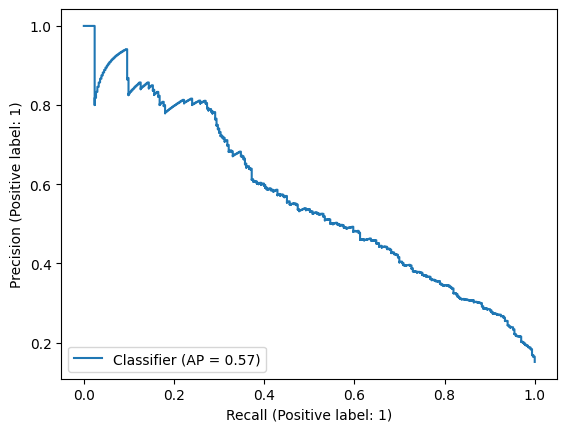

In [49]:
# precision-Recall
from sklearn.metrics import PrecisionRecallDisplay

y_pred = cross_val_predict(pipeline_logreg_best, X, y, cv=skf, n_jobs=-1, method='decision_function')

prc = PrecisionRecallDisplay.from_predictions(y, y_pred)